### Notebook 06: Neural Network

This notebook contains a comparison of the accuracies of the tuned and hybrid models along with explainability analysis using feature importance for the Random Forest model, SHAP values for XGBoost, and permutation importance for the MLP neural network.

In [4]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style="whitegrid", font_scale=1.1)

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load preprocessed data
preprocessed_file = r'C:\Users\anitr\AAI590_Capstone\AAI590_Capstone_AH\Data\ea_modelset\eamodelset\dataset\preprocessed_models.csv'
models_df = pd.read_csv(preprocessed_file)
models_df.head()

,id,name,duplicateCount,elementCount,relationshipCount,viewCount,num_formats,hasWarning,hasDuplicate,rel_elem_ratio,...,language_pl,language_pt,language_ru,language_sl,language_sv,language_tl,language_vi,language_yo,language_zh,arb_outcome
0,id-48fb3807bfa249a9bae607b6a92cc390,LAE,0,142,296,24,4,0,0,2.084507,...,0,0,0,0,0,0,0,0,0,0
1,4cc127d7-6937-42e8-99fb-19f0f6f4991a,Baseline Media Production,0,22,28,1,4,0,0,1.272727,...,0,0,0,0,0,0,0,0,0,1
2,_7RWQ8CqVEey-A40W5C_9dw,buhService,0,55,41,3,4,0,0,0.745455,...,0,0,1,0,0,0,0,0,0,0
3,3846c562-eab4-4e07-aa95-87703e0e0e69,Data model test,0,15,11,1,2,0,0,0.733333,...,0,0,0,0,0,0,0,0,0,1
4,_ay028PGjEeqygJczXaaxEQ,payments-arch,0,18,20,1,4,0,0,1.111111,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Define arb_outcome as target variable (y) and features (X)
X = models_df.drop(columns=['name','id','arb_outcome'])
y = models_df['arb_outcome']

# Check shape of X and y
print(f"Models DataFrame shape: {models_df.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Models DataFrame shape: (978, 41)
Features shape: (978, 38)
Target shape: (978,)


In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (782, 38), (782,)
Test set shape: (196, 38), (196,)


In [7]:
# Scale features for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Load saved models
model_dir = r'C:\Users\anitr\AAI590_Capstone\AAI590_Capstone_AH\Models\tuned_and_hybrid_models'
rf_tuned = joblib.load(os.path.join(model_dir, 'rf_tuned.pkl'))
xgboost_tuned = joblib.load(os.path.join(model_dir, 'xgboost_tuned.pkl'))
hybrid_model_softvoting = joblib.load(os.path.join(model_dir, 'hybrid_softvoting.pkl'))
hybrid_model_stacking = joblib.load(os.path.join(model_dir, 'hybrid_stacking.pkl'))
mlp_tuned = joblib.load(os.path.join(model_dir, 'mlp_tuned.pkl'))


In [9]:
models = {
    'Random Forest Tuned': rf_tuned,
    'XGBoost Tuned': xgboost_tuned,
    'Hybrid-Soft Voting': hybrid_model_softvoting,
    'Hybrid-Stacked': hybrid_model_stacking,
    'Tuned MLP': mlp_tuned
}

# Evaluate models accuracies
performance_data = {'Model': [], 'Accuracy': []}

for model_name, model in models.items():
    if model_name == 'Tuned MLP':
        y_pred = model.predict(X_test_scaled)   
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")


Random Forest Tuned Accuracy: 1.0000
XGBoost Tuned Accuracy: 0.9949
Hybrid-Soft Voting Accuracy: 0.9949
Hybrid-Stacked Accuracy: 1.0000
Tuned MLP Accuracy: 0.9949


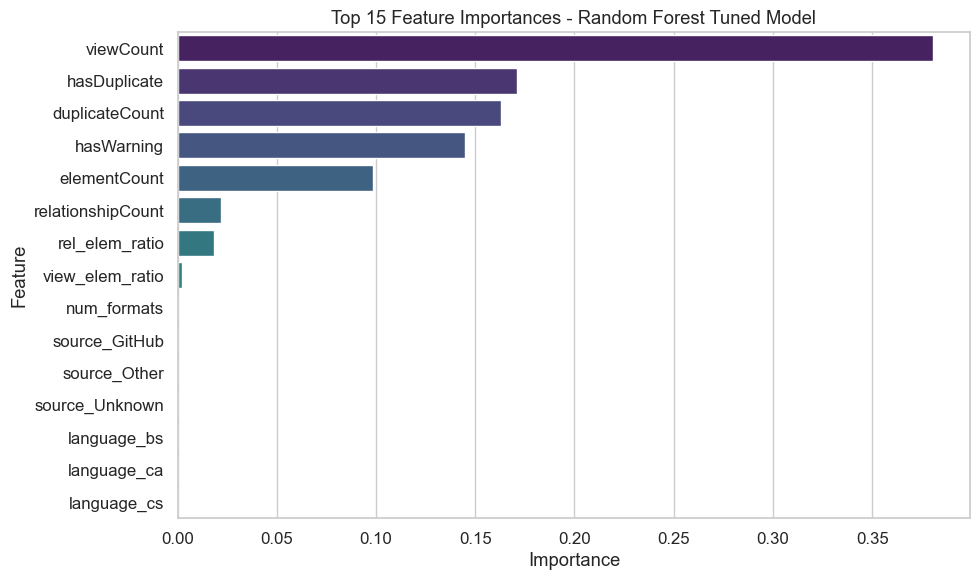

              Feature  Importance
3           viewCount    0.380475
6        hasDuplicate    0.171173
0      duplicateCount    0.163095
5          hasWarning    0.144636
1        elementCount    0.098524
2   relationshipCount    0.021743
7      rel_elem_ratio    0.018306
8     view_elem_ratio    0.002047
4         num_formats    0.000000
9       source_GitHub    0.000000
10       source_Other    0.000000
11     source_Unknown    0.000000
12        language_bs    0.000000
13        language_ca    0.000000
14        language_cs    0.000000


In [15]:
# Determine feature importance for random forest tuned model
importance_rf = rf_tuned.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_rf})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False) 

# Plot feature importance for random forest tuned model
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest Tuned Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print feature importance table
print(feature_importance_df.head(15))



#### The featue importance for the Random Forest model showed that viewCount had the highest importance, followed by hasDuplicate, duplicateCount, and hasWarning. 

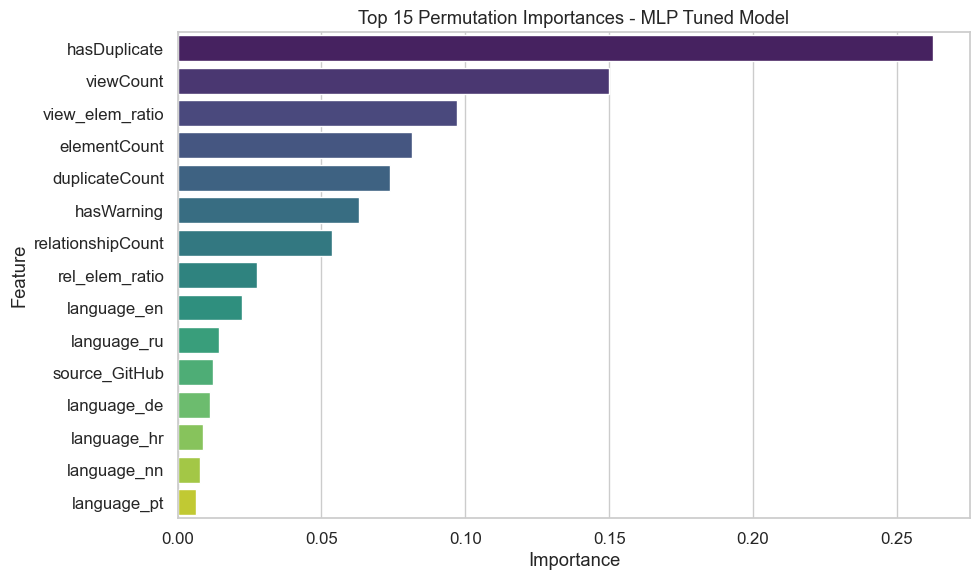

              Feature  Importance       Std
6        hasDuplicate    0.262463  0.019497
3           viewCount    0.150136  0.018237
8     view_elem_ratio    0.097055  0.013185
1        elementCount    0.081371  0.009947
0      duplicateCount    0.073703  0.011773
5          hasWarning    0.063242  0.010640
2   relationshipCount    0.053737  0.006590
7      rel_elem_ratio    0.027653  0.005923
17        language_en    0.022578  0.005792
31        language_ru    0.014329  0.006102
9       source_GitHub    0.012264  0.002480
16        language_de    0.011373  0.007378
21        language_hr    0.008989  0.002047
28        language_nn    0.007720  0.002488
30        language_pt    0.006420  0.003157


In [14]:
# Permutation importance for MLP tuned model
result = permutation_importance(mlp_tuned, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='f1_macro')
perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean, 'Std': result.importances_std}).sort_values(by='Importance', ascending=False)

# Plot permutation importance for MLP tuned model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df.head(15), palette='viridis')
plt.title('Top 15 Permutation Importances - MLP Tuned Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print the table of permutation importances
print(perm_importance_df.head(15))


#### The permutation importance for the MLP model indicated that hasDuplicate has the greatest impact, followed by viewCount, view_elem_ratio, followed by element count.  

Number of classes in shap_values_trimmed: 1
Shape of each class: [(196, 38, 3)]


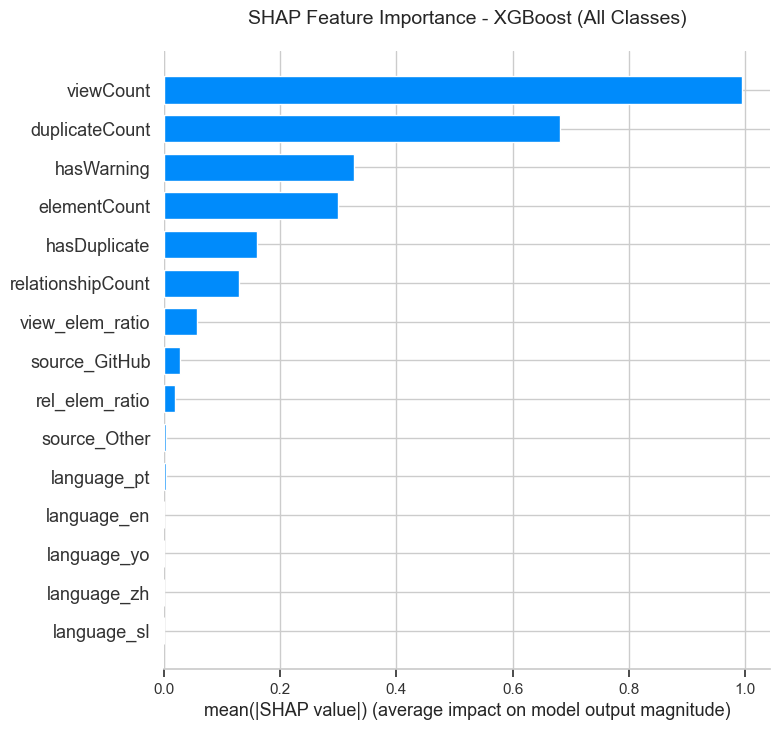

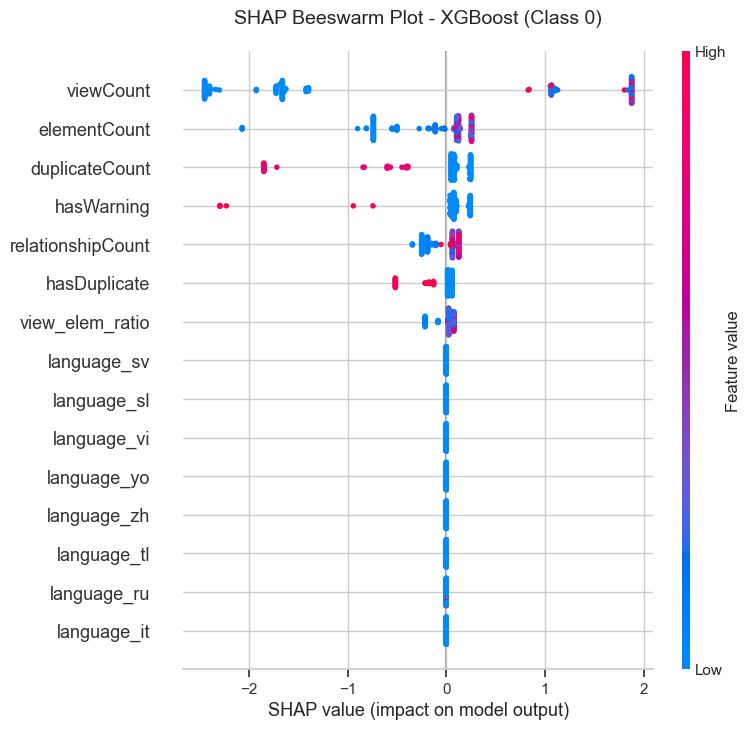

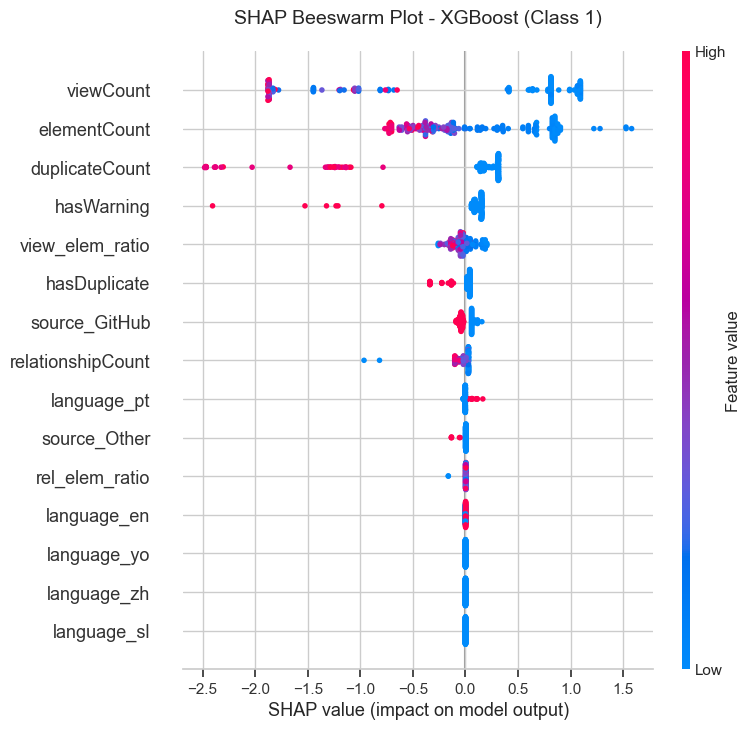

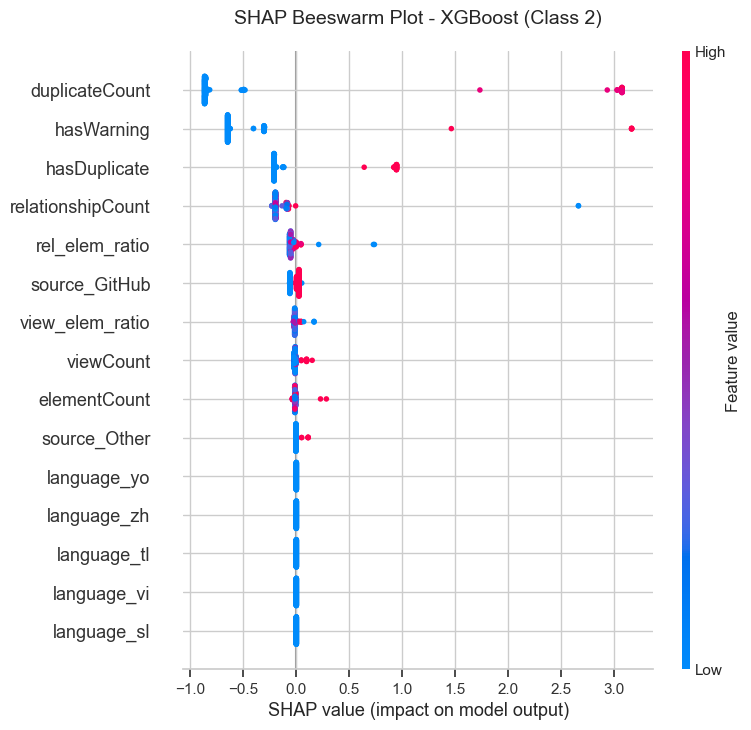

<Figure size 640x480 with 0 Axes>

In [51]:
# SHAP values for XGBoost tuned model
explainer = shap.TreeExplainer(xgboost_tuned)
shap_values = explainer.shap_values(X_test)

if not isinstance(shap_values, list):
    shap_values = [shap_values]

shap_values_trimmed = []
for class_shap_values in shap_values:
    if class_shap_values.shape[1] == X_test.shape[1] +1:
        shap_values_trimmed.append(class_shap_values[:, 1:])
    else:       
        shap_values_trimmed.append(class_shap_values)

# Check the structure of shap_values
print(f"Number of classes in shap_values_trimmed: {len(shap_values_trimmed)}")
print(f"Shape of each class: {[v.shape for v in shap_values_trimmed]}")

# Extract SHAP values for each class from the 3D array
shap_values_class0 = shap_values_trimmed[0][:, :, 0]  # Class 0
shap_values_class1 = shap_values_trimmed[0][:, :, 1]  # Class 1
shap_values_class2 = shap_values_trimmed[0][:, :, 2]  # Class 2

# Plot summary plot for overall feature importance (average across all classes)
shap_values_all = np.mean([np.abs(shap_values_class0), np.abs(shap_values_class1), np.abs(shap_values_class2)], axis=0)
plt.title('SHAP Feature Importance - XGBoost (All Classes)', fontsize=14, pad=20)
shap.summary_plot(shap_values_all, X_test, feature_names=X.columns, plot_type="bar", max_display=15)
plt.tight_layout()


# Plot SHAP beeswarm plot for XGBoost (Class 0) 
plt.title('SHAP Beeswarm Plot - XGBoost (Class 0)', fontsize=14, pad=20)
shap.summary_plot(shap_values_class0, X_test, feature_names=X.columns, max_display=15)
plt.tight_layout()

# Plot SHAP beeswarm plot for XGBoost (Class 1)
plt.title('SHAP Beeswarm Plot - XGBoost (Class 1)', fontsize=14, pad=20)
shap.summary_plot(shap_values_class1, X_test, feature_names=X.columns, max_display=15)
plt.tight_layout()

# Plot SHAP beeswarm plot for XGBoost (Class 2)
plt.title('SHAP Beeswarm Plot - XGBoost (Class 2)', fontsize=14, pad=20)
shap.summary_plot(shap_values_class2, X_test, feature_names=X.columns, max_display=15)
plt.tight_layout()



#### The SHAP values for the XGBoost tuned model indicate that features such as viewCount, hasDuplicate, elementCount, and hasWarning are among the most influential in predicting arbitration outcomes across all classes. Individually, the impact is the same for class 0 (Approved) and class 1 (Needs Work), but slightly different for class 2 (Reject). Class 2 (Reject) includes relationshipCount in its most important features. 


#### Overall, the explainability analysis is consistent with preliminary ARB analysis by features that address real-world ARB concerns. Documentation completeness is indicated by viewCount, architectural completeness by elementCount, and quality issues by hasWarning and hasDuplicate. These features consistently rank high across different models and explainability methods, showing their significance in predicting ARB outcomes.